In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive, files
import zipfile
import os

In [5]:
import zipfile
import os
from google.colab import files
uploaded = files.upload()
# Path to the uploaded zip file and extraction destination
zip_path = "/content/unseen_leaves.zip"
extract_to = "/content"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check if images are there
unseen_folder_path = "/content/unseen_leaves"
if os.path.exists(unseen_folder_path):
    print("Unzipped successfully. Sample files:")
    print(os.listdir(unseen_folder_path)[:5])  # Show a sample of the extracted images
else:
    print("Folder not found.")

Saving unseen_leaves.zip to unseen_leaves.zip
Unzipped successfully. Sample files:
['IMG_20250420_162925_r90_c13.jpg', 'IMG_20250420_160600_r90_c10.jpg', 'IMG_20250420_162421_r90_c13.jpg', 'IMG_20250420_163116_r0_c13.jpg', 'IMG_20250420_163343_1_r180_c10.jpg']


In [6]:
uploaded = files.upload()
zip_path_seen = "/content/seen_leaves.zip"  # Change this when you upload the seen_leaves.zip file

# Unzip the seen leaves zip file
with zipfile.ZipFile(zip_path_seen, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check if seen folder images are there
seen_folder_path = "/content/seen_leaves"
if os.path.exists(seen_folder_path):
    print("Unzipped seen_leaves folder successfully. Sample files:")
    print(os.listdir(seen_folder_path)[:5])  # Show a sample of the extracted images
else:
    print("Seen folder not found.")

Saving seen_leaves.zip to seen_leaves.zip
Unzipped seen_leaves folder successfully. Sample files:
['seen_0946.jpg', 'seen_0706.jpg', 'seen_0521.jpg', 'seen_0267.jpg', 'seen_0410.jpg']


Using fixed threshold: 0.01050


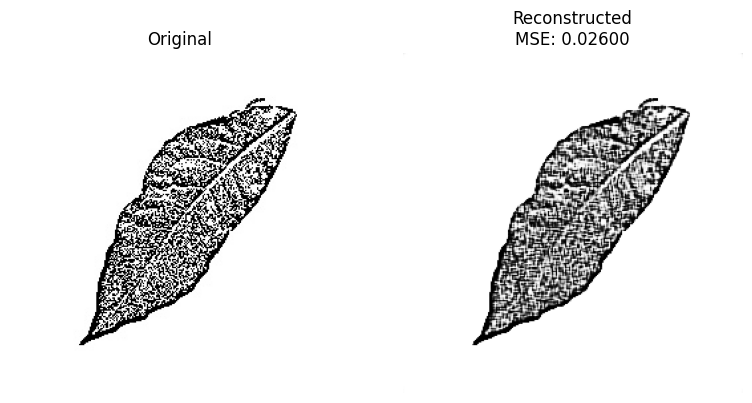

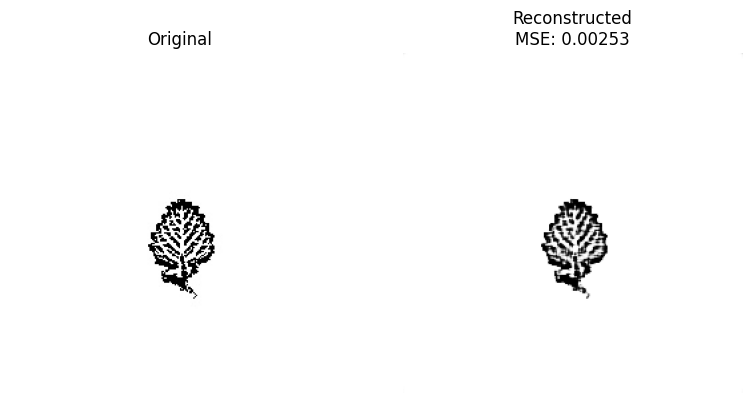

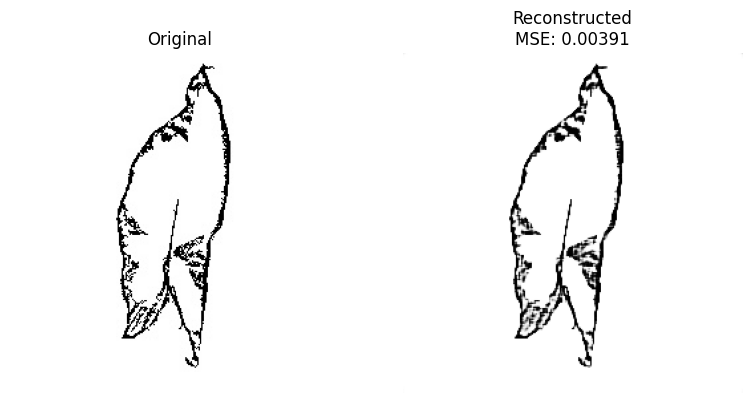

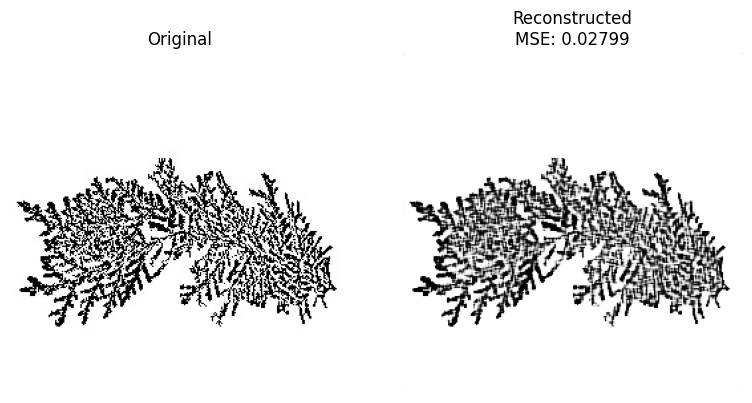

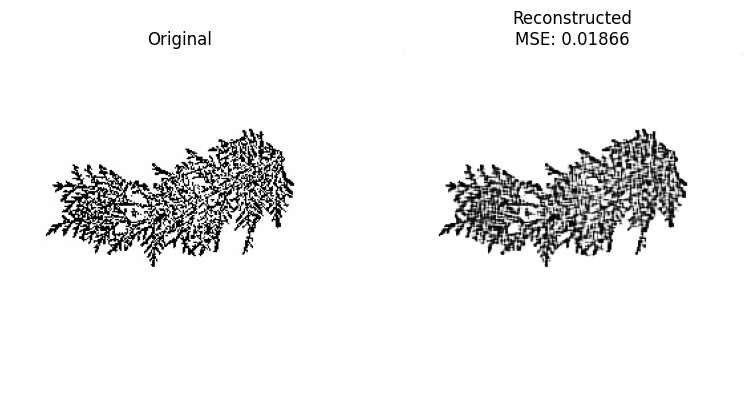

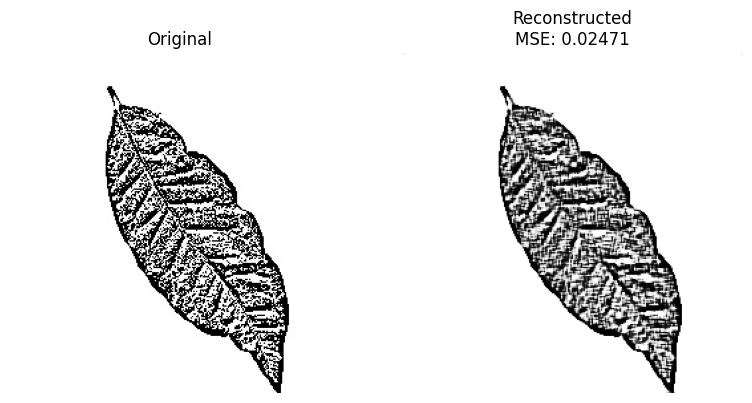

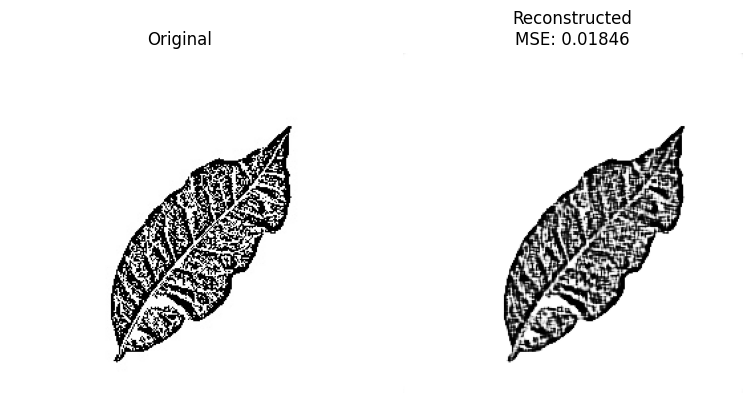


Total images: 1200
Correctly classified (MSE > threshold): 792
Ratio (correct / total): 0.6600
Reconstruction Accuracy (Mean Accuracy for All Images): 88.75%


(0.66, np.float64(88.74668375651042))

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import zipfile
import random

# Load Your Trained Model
model_path = "/content/drive/MyDrive/NNminipro1_modified/autoenco_corr_final_model_modified.h5"
model = load_model(model_path, compile=False)  # Used compile=False to avoid 'mse' loading error

# Fixed threshold based on train MSE
threshold = 0.0105  # Based on train MSE
print(f"Using fixed threshold: {threshold:.5f}")

# Unzip the unseen_leaves.zip file (update this path for unseen data)
zip_file_path = '/content/unseen_leaves.zip'  # Update path for unseen folder
unzip_folder_path = '/content/unseen_leaves'  # Update path for unseen folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder_path)

# Reconstruction Accuracy Function
def reconstruction_accuracy(original, reconstructed, threshold=0.01050):
    """
    Calculates reconstruction accuracy as:
    (accurate_pixels / total_pixels) * 100
    where a pixel is accurate if abs(diff) < threshold
    """
    differences = np.abs(original - reconstructed)
    accurate_pixels = np.sum(differences < threshold)
    total_pixels = np.prod(original.shape)
    accuracy = (accurate_pixels / total_pixels) * 100
    return accuracy

# Evaluation Function for Unseen Folder
def evaluate_unseen_folder_preprocessed(model, folder_path, threshold):
    total = 0
    correct = 0
    images = []
    recons = []
    mses = []
    accuracy_list = []  # List to store the accuracy for each image

    for fname in sorted(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        img = cv2.resize(img, (256, 256))
        img = img.astype("float32") / 255.0

        inp = np.expand_dims(img, axis=(0, -1))
        recon = model.predict(inp, verbose=0)[0, :, :, 0]
        mse = np.mean((img - recon) ** 2)

        mses.append(mse)
        images.append(img)
        recons.append(recon)

        # Calculate Reconstruction Accuracy for this image
        accuracy = reconstruction_accuracy(img, recon, threshold)
        accuracy_list.append(accuracy)

        if mse > threshold:  # Correctly classified (MSE > threshold, belongs to MBMU)
            correct += 1
        total += 1

    # Plot 7 random reconstructions
    indices = random.sample(range(len(images)), min(7, len(images)))
    for i in indices:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(recons[i], cmap='gray')
        plt.title(f"Reconstructed\nMSE: {mses[i]:.5f}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Final stats
    ratio = correct / total if total > 0 else 0
    mean_mse = np.mean(mses)
    mean_accuracy = np.mean(accuracy_list)

    print(f"\nTotal images: {total}")
    print(f"Correctly classified (MSE > threshold): {correct}")
    print(f"Ratio (correct / total): {ratio:.4f}")
    print(f"Reconstruction Accuracy (Mean Accuracy for All Images): {mean_accuracy:.2f}%")
    return ratio, mean_accuracy

# Call the evaluation function for the unseen folder
evaluate_unseen_folder_preprocessed(model, unzip_folder_path, threshold)



Using fixed threshold: 0.01050


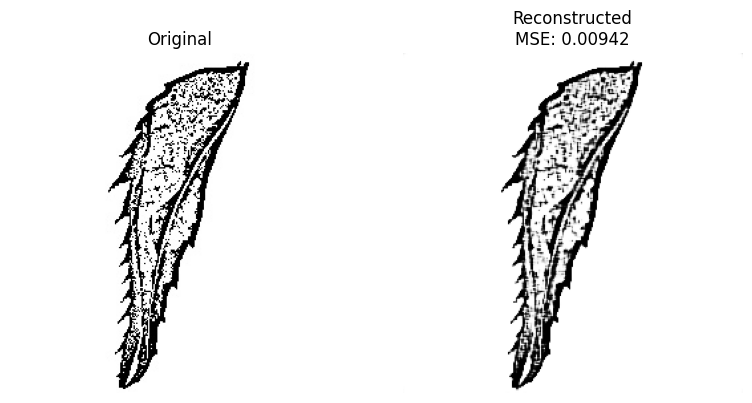

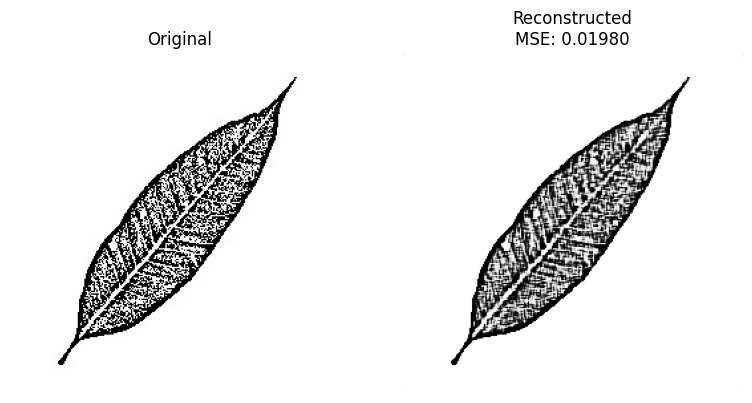

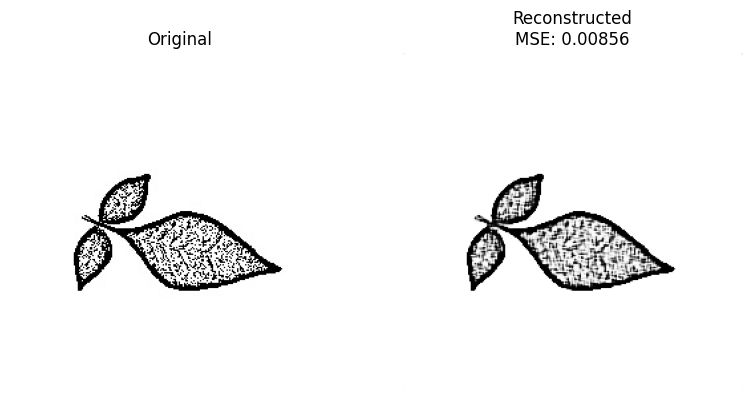

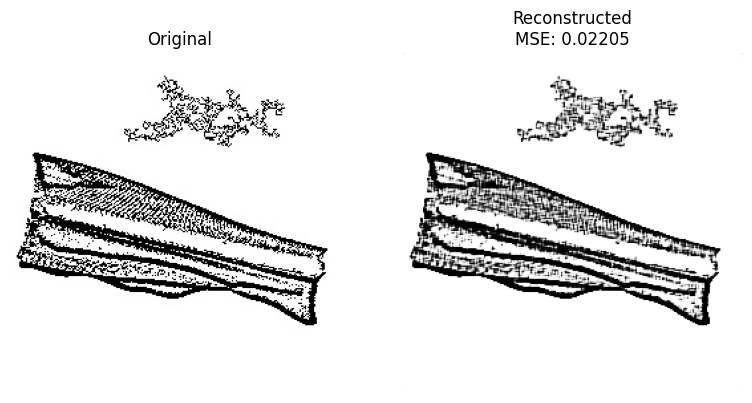

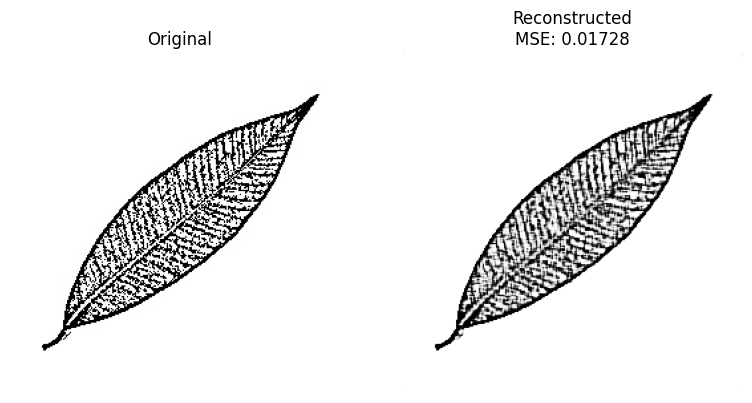

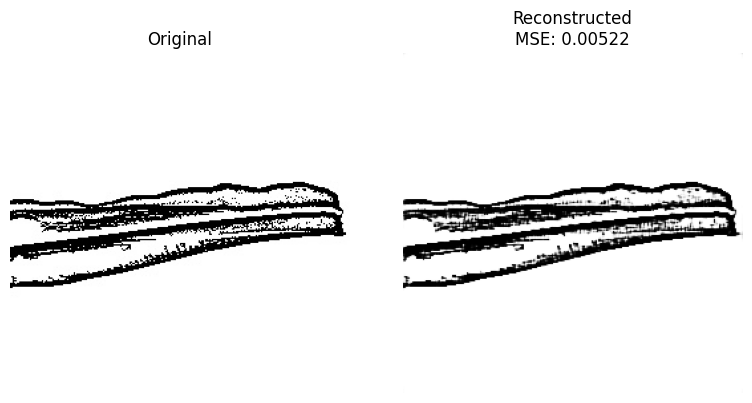

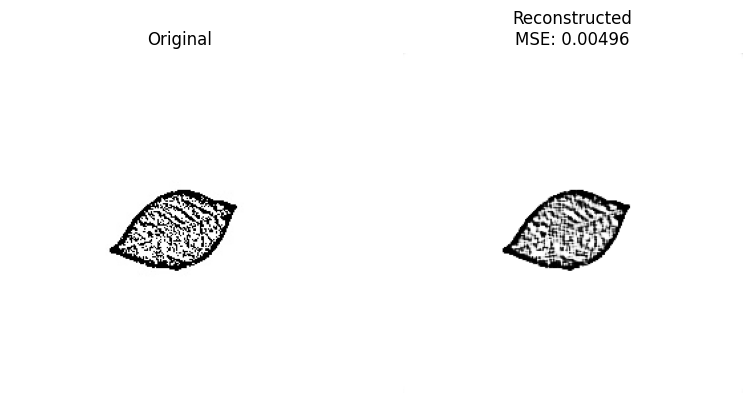


Total images: 1200
Correctly classified (MSE < threshold): 616
Ratio (correct / total): 0.5133
Reconstruction Accuracy (Mean Accuracy for All Images): 90.09%


(0.5133333333333333, np.float64(90.08814366658528))

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import zipfile
import random

# Load Your Trained Model
model_path = "/content/drive/MyDrive/NNminipro1_modified/autoenco_corr_final_model_modified.h5"
model = load_model(model_path, compile=False)  # Used compile=False to avoid 'mse' loading error

# Fixed threshold based on train MSE
threshold = 0.0105  # Based on train MSE
print(f"Using fixed threshold: {threshold:.5f}")

# Unzip the seen_leaves.zip file
zip_file_path = '/content/seen_leaves.zip'
unzip_folder_path = '/content/seen_leaves'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder_path)

# Reconstruction Accuracy Function
def reconstruction_accuracy(original, reconstructed, threshold=0.01050):
    """
    Calculates reconstruction accuracy as:
    (accurate_pixels / total_pixels) * 100
    where a pixel is accurate if abs(diff) < threshold
    """
    differences = np.abs(original - reconstructed)
    accurate_pixels = np.sum(differences < threshold)
    total_pixels = np.prod(original.shape)
    accuracy = (accurate_pixels / total_pixels) * 100
    return accuracy

# Evaluation Function for Seen Folder
def evaluate_seen_folder_preprocessed(model, folder_path, threshold):
    total = 0
    correct = 0
    images = []
    recons = []
    mses = []
    accuracy_list = []  # List to store the accuracy for each image

    for fname in sorted(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        img = cv2.resize(img, (256, 256))
        img = img.astype("float32") / 255.0

        inp = np.expand_dims(img, axis=(0, -1))
        recon = model.predict(inp, verbose=0)[0, :, :, 0]
        mse = np.mean((img - recon) ** 2)

        mses.append(mse)
        images.append(img)
        recons.append(recon)

        # Calculate Reconstruction Accuracy for this image
        accuracy = reconstruction_accuracy(img, recon, threshold)
        accuracy_list.append(accuracy)

        if mse < threshold:  # Correctly classified (MSE < threshold, belongs to MBMU)
            correct += 1
        total += 1

    # Plot 7 random reconstructions
    indices = random.sample(range(len(images)), min(7, len(images)))
    for i in indices:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(recons[i], cmap='gray')
        plt.title(f"Reconstructed\nMSE: {mses[i]:.5f}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Final stats
    ratio = correct / total if total > 0 else 0
    mean_mse = np.mean(mses)
    mean_accuracy = np.mean(accuracy_list)

    print(f"\nTotal images: {total}")
    print(f"Correctly classified (MSE < threshold): {correct}")
    print(f"Ratio (correct / total): {ratio:.4f}")
    print(f"Reconstruction Accuracy (Mean Accuracy for All Images): {mean_accuracy:.2f}%")
    return ratio, mean_accuracy

# Call the evaluation function for the seen folder
evaluate_seen_folder_preprocessed(model, unzip_folder_path, threshold)

